In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X = X.to_numpy()
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

(-0.5, 27.5, 27.5, -0.5)

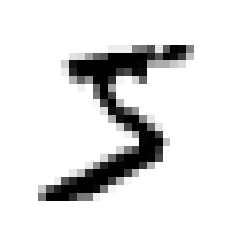

In [10]:
random_digit = X[0]
random_digit_image = random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap='binary')
plt.axis('off')


In [32]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [52]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [53]:
idx = 99
random_digit = X_test[idx]
prediction = sgd_clf.predict([random_digit])
Actual = y_test_8[idx]
print(f'Actual digit : {Actual}\n Prediction : {prediction}')
#random_digit_image = random_digit.reshape(28, 28)
#plt.imshow(random_digit_image, cmap='binary')

Actual digit : False
 Prediction : [False]


In [54]:
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.909  , 0.9286 , 0.88285])

In [ ]:
cross_validate(sgd_clf, X_train, y_train_8, cv=3, scoring=["accuracy", "recall", "precision"])

In [56]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [59]:
confusion_matrix(y_train_8, y_train_pred)

array([[50006,  4143],
       [ 1448,  4403]])

In [62]:
precision_score(y_train_8, y_train_pred)

0.515211794991809

In [63]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356

In [65]:
f1_score(y_train_8, y_train_pred)

0.611655205945683

In [66]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

In [69]:
precison, recall, threshold = precision_recall_curve(y_train_8, y_scores)

In [89]:
def plot_curve(precison, recall, threhsold):
    plt.plot(threshold, precison[:-1], 'b--', label="Precision")
    plt.plot(threshold, recall[:-1], 'g--', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.axhline(0.90, c='r', ls=':')
    plt.axhline(0.80, c='r', ls=':')
    


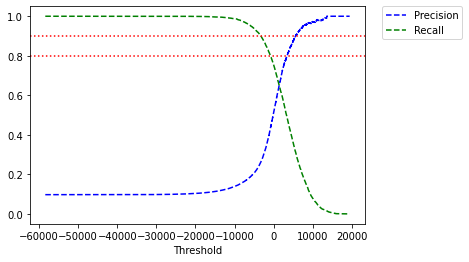

In [90]:
plot_curve(precison, recall, threshold)

In [91]:
def plot_precision_recall(precison, recall):
    plt.plot(recall[:-1], precison[:-1], 'b--')
    plt.ylabel("precision")
    plt.xlabel("recall")
    plt.axhline(0.90, c='r', ls=':')
    plt.axhline(0.80, c='r', ls=':')

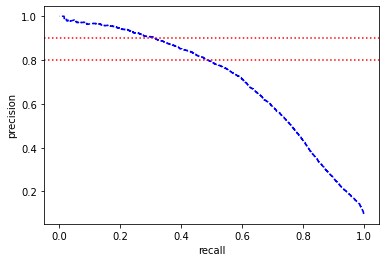

In [92]:
plot_precision_recall(precison, recall)

In [94]:
tpr, fpr, thresholds = roc_curve(y_train_8, y_scores)

In [107]:
def plot_roc_curve(tpr, fpr, threshold):
    plt.plot(tpr[:-1], fpr[:-1], 'b--')
    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.plot([0, 1],[0, 1], 'k--')

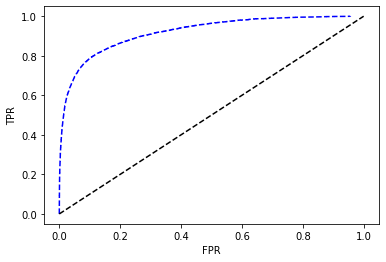

In [108]:
plot_roc_curve(tpr, fpr, thresholds)

In [9]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


array([5], dtype=uint8)

Predicted is : [7]


(-0.5, 27.5, 27.5, -0.5)

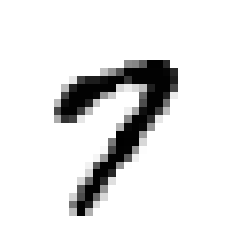

In [24]:
random_digit = X[15]
print(f'Predicted is : {svm_clf.predict([random_digit])}')
random_digit_image = random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap='binary')
plt.axis('off')


In [25]:
random_digit_score = svm_clf.decision_function([random_digit])
#print(f'random digit score is {random_digit_score}')
print(f'max score is of {svm_clf.classes_[np.argmax(random_digit_score)]}')
print(f'Predicted is : {svm_clf.predict([random_digit])}')

max score is of 7
Predicted is : [7]


In [28]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/tiger02151/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tiger02151/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9014, 0.9011, 0.9056])

In [29]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

/home/tiger02151/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5590,    0,   23,    6,    9,   52,   36,    6,  200,    1],
       [   1, 6406,   39,   25,    4,   45,    4,    8,  198,   12],
       [  28,   29, 5259,   96,   72,   28,   68,   40,  327,   11],
       [  25,   17,  122, 5248,    1,  222,   27,   42,  355,   72],
       [  12,   14,   48,   11, 5213,   12,   37,   26,  293,  176],
       [  28,   16,   33,  177,   51, 4501,   75,   16,  460,   64],
       [  30,   16,   44,    3,   42,  100, 5563,    3,  116,    1],
       [  20,   10,   54,   30,   51,   14,    3, 5704,  157,  222],
       [  18,   64,   44,   89,    3,  133,   27,   11, 5415,   47],
       [  23,   20,   29,   66,  120,   37,    1,  177,  308, 5168]])

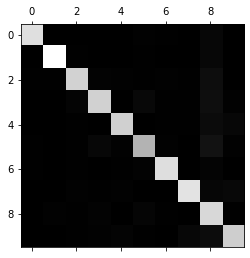

In [30]:
plt.matshow(conf_mat, cmap=plt.cm.gray)

In [35]:
row_sum = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat/row_sum
np.fill_diagonal(norm_conf_mat, 0)

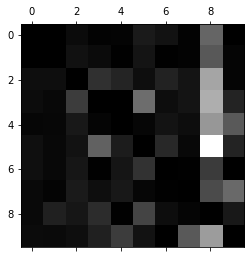

In [36]:
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)